<a href="https://colab.research.google.com/github/karu-bee/OfficeWorkManual/blob/master/ASSESS_0818_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
%tensorflow_version 1.x 
import google.colab
import googleapiclient.discovery
import googleapiclient.http
google.colab.auth.authenticate_user()
drive_service = googleapiclient.discovery.build('drive', 'v3')
def uploadgdrive(nparray, filename):
  df = pd.DataFrame(nparray)
  df.to_csv( filename +'.csv', index = False) #, header = False)
  saving_filename =  filename + '.csv'
  file_metadata = {'name': saving_filename,'mimeType': 'application/octet-stream'}
  media = googleapiclient.http.MediaFileUpload(saving_filename,mimetype='application/octet-stream',resumable=True)
  created = drive_service.files().create(body=file_metadata,media_body=media,fields='id').execute()
def dlgdrive(upload_filename):
    file_list = drive_service.files().list(q="name='" + upload_filename + "'").execute().get('files')
    file_id = None
    for file in file_list:
      if file.get('name') == upload_filename:
        file_id = file.get('id')
        break
    if file_id is None:
      print(upload_filename + ' が見つかりません.')
    else:
      with open(upload_filename, 'wb') as f:
        request = drive_service.files().get_media(fileId=file_id)
        media = googleapiclient.http.MediaIoBaseDownload(f, request)
        done = False
        while not done:
          progress_status, done = media.next_chunk()
          print(100*progress_status.progress(), end="")
          print("%完了")
      print('GoogleドライブからColab環境へのファイル取り込みが完了しました.')
#USAGE
#uploadgdrive(pred_train_2, 'pred_train_2')
#uploadgdrive(pred_test_2, 'pred_test_2') 
#dlgdrive('pred_train_2.csv')
#dlgdrive('pred_test_2.csv')  

In [45]:
########################### train.csv ########################################
upload_filename = 'train.csv'
file_list = drive_service.files().list(q="name='" + upload_filename + "'").execute().get('files')
# ファイル ID を取得します。
file_id = None
for file in file_list:
  if file.get('name') == upload_filename:
    file_id = file.get('id')
    break
if file_id is None:
  # ファイル ID を取得できなかった場合はエラーメッセージを出力します。
  print(upload_filename + ' が見つかりません.')
else:
  # colab 環境へファイルをアップロードします。
  with open(upload_filename, 'wb') as f:
    request = drive_service.files().get_media(fileId=file_id)
    media = googleapiclient.http.MediaIoBaseDownload(f, request)
    done = False
    while not done:
      progress_status, done = media.next_chunk()
      print(100*progress_status.progress(), end="")
      print("%完了")
  print('GoogleドライブからColab環境へのファイル取り込みが完了しました.')
########################### test.csv ########################################
upload_filename = 'test.csv'
file_list = drive_service.files().list(q="name='" + upload_filename + "'").execute().get('files')
# ファイル ID を取得します。
file_id = None
for file in file_list:
  if file.get('name') == upload_filename:
    file_id = file.get('id')
    break
if file_id is None:
  # ファイル ID を取得できなかった場合はエラーメッセージを出力します。
  print(upload_filename + ' が見つかりません.')
else:
  # colab 環境へファイルをアップロードします。
  with open(upload_filename, 'wb') as f:
    request = drive_service.files().get_media(fileId=file_id)
    media = googleapiclient.http.MediaIoBaseDownload(f, request)
    done = False
    while not done:
      progress_status, done = media.next_chunk()
      print(100*progress_status.progress(), end="")
      print("%完了")
  print('GoogleドライブからColab環境へのファイル取り込みが完了しました.')

100.0%完了
GoogleドライブからColab環境へのファイル取り込みが完了しました.
100.0%完了
GoogleドライブからColab環境へのファイル取り込みが完了しました.


In [46]:
# 前処理
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### データーロード ###
dfx_train_org = pd.read_csv('train.csv')
dfx_test_org = pd.read_csv('test.csv')
print(dfx_train_org.shape) 
print(dfx_test_org.shape)
testID = dfx_test_org.iloc[:,0].values.astype(int)
# Train+Test結合
dfx_t = pd.concat([dfx_train_org, dfx_test_org], sort=False)
print(dfx_t.shape)
# 不要データ削除
dfx_to =  dfx_t.drop([ 'amenities', 'first_review', 'last_review',
                        'description', 'host_response_rate', 
                        'review_scores_rating', 'neighbourhood', 
                        'name', 'thumbnail_url', 'zipcode'], axis=1)
print(dfx_to.shape)
#日付変換
d = pd.to_datetime(dfx_to['host_since'], format='%Y-%m-%d')
dfx_to['host_since'] = d.dt.year
#欠損値確認
def kesson_table(df):
  null_val0 = df.isnull()
  null_val = null_val0.sum()
  percent = 100 * null_val / len(df)
  kesson_table = pd.concat([null_val, percent], axis=1)
  kesson_table_ren_columns=kesson_table.rename(columns = {0 : '欠損数', 1 : '%'})
  return kesson_table_ren_columns
#print(kesson_table(dfx_to))
dfx_tot = dfx_to.fillna(-1)
print(dfx_tot.shape)
# One-Hotエンコーディング
dfx_tota = pd.get_dummies(dfx_tot, columns=[ 'bed_type','cancellation_policy','city','cleaning_fee',
                                             'host_has_profile_pic','host_identity_verified',
                                              'instant_bookable','property_type','room_type',
                                              ])
"""
#カテゴリ変数にラベルエンコーディングを適用する
from sklearn.preprocessing import LabelEncoder
for c in []:
  le=LabelEncoder()
  le.fit(dfx_tot[c])
  dfx_tot[c] = le.transform(dfx_tot[c])  
"""
dfx_tota.shape

(55583, 29)
(18528, 28)
(74111, 29)
(74111, 19)
(74111, 19)


(74111, 74)

In [47]:
# 縦に連結したデータをモデル作成用と予測対象用に切り戻す
train_d = dfx_tota[0:55583].copy()
test_d = dfx_tota[55583:].copy()
print(train_d.shape)
print(test_d.shape)
# 目的変数と説明変数に分ける
dfy_train = train_d.loc[:,'y']
dfx_train = train_d.drop(['y'],axis=1)
dfx_test = test_d.drop(['y'],axis=1)
print(dfx_train.shape)
print(dfx_test.shape)
train_x = dfx_train.values
x_test = dfx_test.values
train_y = dfy_train.values
print('train_x.shape',train_x.shape)
print('x_test.shape',x_test.shape)
print('train_y.shape',train_y.shape)

(55583, 74)
(18528, 74)
(55583, 73)
(18528, 73)
train_x.shape (55583, 73)
x_test.shape (18528, 73)
train_y.shape (55583,)


In [48]:
#hold-out法
tr_x, va_x, tr_y, va_y = train_test_split(train_x, train_y, test_size=0.25, random_state=71,shuffle=True)
print('tr_x.shape',tr_x.shape)
print('tr_y.shape',tr_y.shape)
print('va_x.shape',va_x.shape)
print('va_y.shape',va_y.shape)

tr_x.shape (41687, 73)
tr_y.shape (41687,)
va_x.shape (13896, 73)
va_y.shape (13896,)


In [49]:
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import BatchNormalization, Activation, Input
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from keras.utils import to_categorical

# ニューラルネットによるモデル
class MLP:
    def __init__(self):
        self.model = None
        self.scaler = None

    def fit(self, tr_x, tr_y, va_x, va_y):
        self.scaler = StandardScaler()
        self.scaler.fit(tr_x)
        tr_x = self.scaler.transform(tr_x)
        va_x = self.scaler.transform(va_x)
        print(tr_x.shape,va_x.shape)

        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(tr_x.shape[1],)))
        model.add(Dropout(0.2))
        model.add(Dense(32))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(16))
        model.add(BatchNormalization())
        model.add(Activation('relu'))
        model.add(Dropout(0.2))
        model.add(Dense(1))
        
        def step_decay(epoch):
          x = 0.01
          if epoch >= 25: x = 0.005
          if epoch >= 50: x = 0.001
          if epoch >= 75: x = 0.0005
          return x
              
        lr_decay = LearningRateScheduler(step_decay)
        early_stopping = EarlyStopping(patience=10, verbose=1) 
        model.compile(optimizer=Adam(lr=0.01), loss='mse', metrics=['mae'])
        history = model.fit(tr_x, tr_y,   #トレーニングデータ
                            batch_size=64, #バッチサイズの指定
                            epochs=100,   #エポック数の指定
                            verbose=1,    #ログ出力の指定
                            validation_data=(va_x, va_y), #テストデータ
                            callbacks=[
                                       lr_decay 
                                       #early_stopping
                                       ]
                            )
        
        fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
        def plot_history_loss(fit):
            axL.plot(fit.history['loss'],label="loss for training")
            axL.plot(fit.history['val_loss'],label="loss for validation")
            axL.set_title('model loss')
            axL.set_xlabel('epoch')
            axL.set_ylabel('loss')
            axL.legend(loc='upper right')
        def plot_history_acc(fit):
            axR.plot(fit.history['accuracy'],label="acc for training")
            axR.plot(fit.history['val_accuracy'],label="acc for validation")
            axR.set_title('model accuracy')
            axR.set_xlabel('epoch')
            axR.set_ylabel('accuracy')
            axR.legend(loc='lower right')
        plot_history_loss(history)
        #plot_history_acc(history)
        self.model = model

    def predict(self, x):
        x = self.scaler.transform(x)
        pred = self.model.predict(x)
        return pred

(41687, 73) (13896, 73)
Train on 41687 samples, validate on 13896 samples
Epoch 1/100
41687/41687 [==============================] - 2s 56us/sample - loss: 26320.5025 - mean_absolute_error: 91.7218 - val_loss: 14784.3920 - val_mean_absolute_error: 63.0165
Epoch 2/100
41687/41687 [==============================] - 2s 44us/sample - loss: 17163.6780 - mean_absolute_error: 69.7411 - val_loss: 14438.8851 - val_mean_absolute_error: 62.0441
Epoch 3/100
41687/41687 [==============================] - 2s 45us/sample - loss: 16788.1749 - mean_absolute_error: 68.6521 - val_loss: 14303.0698 - val_mean_absolute_error: 61.2966
Epoch 4/100
41687/41687 [==============================] - 2s 45us/sample - loss: 16763.3128 - mean_absolute_error: 69.0597 - val_loss: 14243.9122 - val_mean_absolute_error: 62.2738
Epoch 5/100
41687/41687 [==============================] - 2s 48us/sample - loss: 16615.3820 - mean_absolute_error: 68.6214 - val_loss: 14257.7707 - val_mean_absolute_error: 60.9505
Epoch 6/100
4168

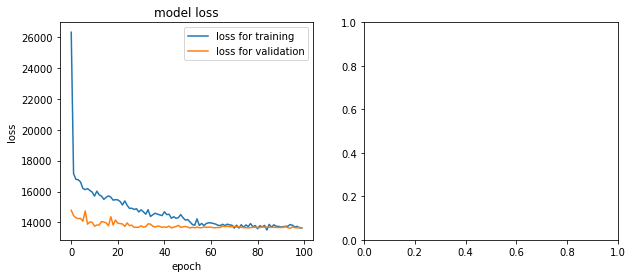

In [50]:
# 学習
model = MLP()
model.fit(tr_x, tr_y, va_x, va_y)

In [51]:
# 評価

va_pred = model.predict(va_x)

from sklearn.metrics import mean_absolute_error
print("MAE =",mean_absolute_error(va_y, va_pred))

from sklearn.metrics import mean_squared_error
print("MSE =", mean_squared_error(va_y, va_pred))

from sklearn.metrics import mean_squared_error
print( "RMSE =", np.sqrt(mean_squared_error(va_y, va_pred)))

from sklearn.metrics import r2_score
print("R2 =",r2_score(va_y, va_pred))

MAE = 60.03052981255311
MSE = 13637.652544435487
RMSE = 116.78036026847788
R2 = 0.496675291223294


In [52]:
y_pred = model.predict(x_test)
print(y_pred.shape)
# PassengerIDと予測結果を張り合わせて提出用CSVファイル作成
id = testID.reshape(-1,1)
out = np.concatenate([id.astype(int), y_pred], axis=1)
submission = pd.DataFrame(out)
submission

(18528, 1)


,0,1
0,0.0,225.302429
1,1.0,118.455650
2,2.0,89.340256
3,3.0,190.180756
4,4.0,202.262390
...,...,...
18523,18523.0,202.192505
18524,18524.0,136.881836
18525,18525.0,185.518372
18526,18526.0,157.952087


In [54]:
submission.to_csv('submission.csv' , index = False, header = False)
saving_filename = "submission.csv"
file_metadata = {
  'name': saving_filename,
  'mimeType': 'application/octet-stream'
}
media = googleapiclient.http.MediaFileUpload(saving_filename, 
                        mimetype='application/octet-stream',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()